In [5]:
#Imports:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Dataframe:
df = pd.read_csv("profiles.csv")
df = df.dropna()

#Mapping:
drink_mapping = {"not at all": 0, "rarely": 1, "socially": 2, "often": 3, "very often": 4, "desperately": 5}
df["drinks_code"] = df.drinks.map(drink_mapping)

smokes_mapping = {"no": 0, "sometimes": 1, "when drinking": 2, "yes": 3, "trying to quit": 4}
df["smokes_code"] = df.smokes.map(smokes_mapping)

drugs_mapping = {"never": 0, "sometimes": 1, "often": 2}
df["drugs_code"] = df.drugs.map(drugs_mapping)

orientation_mapping = {"straight": 0, "gay": 1, "bisexual": 2}
df["orientation_code"] = df.orientation.map(orientation_mapping)

status_mapping = {"single": 0, "available": 1, "seeing someone": 2, "married": 3}
df["status_code"] = df.status.map(status_mapping)

# Split train, test

features = df[['smokes_code', 'drinks_code', 'drugs_code','orientation_code','status_code']]
label = df['sex']

x_train, x_test, y_train, y_test = train_test_split(features,label,test_size=0.2)

# Scale
scaler = StandardScaler()
train_features = scaler.fit_transform(x_train)
test_features = scaler.transform(x_test)

# Create and train the model
model = LogisticRegression()
model.fit(x_train, y_train)

# Scores and analyze coeffs
score_train = model.score(x_train, y_train)
print(score_train)
score_test = model.score(x_test, y_test)
print(score_test)
print(model.coef_)
print(list(zip(['drinks_code', 'smokes_code', 'drugs_code', 'orientation_code','status_code'],model.coef_[0])))

0.573049645390071
0.5657596371882087
[[ 0.13126259 -0.05050672  0.40369947 -0.54259723 -0.02552797]]
[('drinks_code', 0.13126259495495265), ('smokes_code', -0.050506720649647965), ('drugs_code', 0.4036994662450552), ('orientation_code', -0.5425972312643436), ('status_code', -0.02552797420710838)]


In [8]:
# Sample passenger features
super_healthy_straight_single = np.array([0,0,0,0,0])
social_gay_available = np.array([2,2,1,1,1])
bisexual_seeing_someone_smokes_and_drugs = np.array([4,3,2,2,2])

# Combine and scale
sample_profiles = np.array([profile_one,profile_two,profile_three])
sample_profiles = scaler.transform(sample_profiles)

# Predictions!
print(model.predict(sample_profiles))
print(model.predict_proba(sample_profiles))

['m' 'f' 'm']
[[0.42725414 0.57274586]
 [0.64230798 0.35769202]
 [0.09655421 0.90344579]]


Conclusions

  sex  count
0   f   1937
1   m   2470


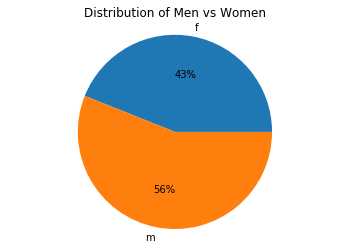

In [12]:
sex_df = df.groupby('sex')['age'].count().reset_index()
sex_df.rename(columns = {'age':'count'}, inplace = True)
print(sex_df)

plt.pie(sex_df['count'], labels = sex_df['sex'], autopct = '%d%%')
plt.axis('equal')
plt.title('Distribution of Men vs Women')
plt.show()

if you are looking for a healthy, straight single, the probability of getting matched with a woman / man is:'

In [34]:
print((model.predict_proba(sample_profiles))[0])

[0.42725414 0.57274586]


if you are looking for a social gay who is available, the probability of getting matched with a woman / man is:'

In [35]:
print((model.predict_proba(sample_profiles))[1])

[0.64230798 0.35769202]


if you are looking for a bisexual who is seeing someone and smokes and drinks, the probability of getting matched with a woman / man is:'

In [32]:
print((model.predict_proba(sample_profiles))[2])

[0.09655421 0.90344579]
